# Convolutional Neural Network

In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
import numpy as np
import cv2
import os
from tqdm import tqdm

In [13]:
# Step 1: Set the correct dataset path
dataset_path = '/content/dataset'  # Path to your dataset

In [14]:
# Step 2: Initialize arrays for storing images and labels
X = []
y = []

# Define the classes (assuming four types of eye diseases)
classes = ['cataract', 'glaucoma', 'normal', 'diabetic_retinopathy']


In [15]:
# Step 3: Loop through each class folder and load images
for i, class_name in enumerate(classes):
    class_path = os.path.join(dataset_path, class_name)  # Path to each class folder

    for img_name in tqdm(os.listdir(class_path)):  # List all image files in the class folder
        img_path = os.path.join(class_path, img_name)  # Full path to the image
        img = cv2.imread(img_path)  # Read the image

        if img is not None:  # Make sure the image is loaded correctly
            img = cv2.resize(img, (224, 224))  # Resize to the desired input size
            X.append(img)  # Add the image to the list
            y.append(i)  # Use class index as label

# Step 4: Convert to NumPy arrays for model input
X = np.array(X)
y = np.array(y)


100%|██████████| 1098/1098 [00:11<00:00, 95.25it/s] 


In [16]:
# Display the shape of X and y
print(f"Loaded {X.shape[0]} images with shape {X.shape[1:]} and {y.shape[0]} labels.")

Loaded 4217 images with shape (224, 224, 3) and 4217 labels.


In [17]:
# Step 5: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# One-hot encode the labels
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)

print("X_train Shape: ", X_train.shape)
print("X_test Shape: ", X_test.shape)
print("y_train Shape: ", y_train.shape)
print("y_test Shape: ", y_test.shape)


X_train Shape:  (2825, 224, 224, 3)
X_test Shape:  (1392, 224, 224, 3)
y_train Shape:  (2825, 4)
y_test Shape:  (1392, 4)


In [18]:
# Step 6: Build a custom CNN model
model = Sequential()

# Add convolutional layers with max-pooling
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten the output and add fully connected layers
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))  # Dropout to reduce overfitting
model.add(Dense(256, activation='relu'))
model.add(Dense(4, activation='softmax'))  # 4 classes for output layer

# Step 7: Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 8: Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), verbose=1)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 372s 4s/step - accuracy: 0.4142 - loss: 12.5468 - val_accuracy: 0.5661 - val_loss: 0.8444
Epoch 2/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 360s 4s/step - accuracy: 0.6294 - loss: 0.8230 - val_accuracy: 0.7134 - val_loss: 0.6445
Epoch 3/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 375s 4s/step - accuracy: 0.6944 - loss: 0.6584 - val_accuracy: 0.7155 - val_loss: 0.6218
Epoch 4/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 385s 4s/step - accuracy: 0.7074 - loss: 0.6033 - val_accuracy: 0.6774 - val_loss: 0.6396
Epoch 5/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 341s 4s/step - accuracy: 0.7158 - loss: 0.5916 - val_accuracy: 0.7213 - val_loss: 0.6012
Epoch 6/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 429s 4s/step - accuracy: 0.7361 - loss: 0.5706 - val_accuracy: 0.7328 - val_loss: 0.6106
Epoch 7/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 397s 4s/step - accuracy: 0.7437 - loss: 0.5614 - val_accuracy: 0.7500 - val_loss: 0.5780
Epoch 8/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 380s 4s/step - accuracy: 0.7564 - loss: 0.5400 - val_accuracy: 0.7335 - 

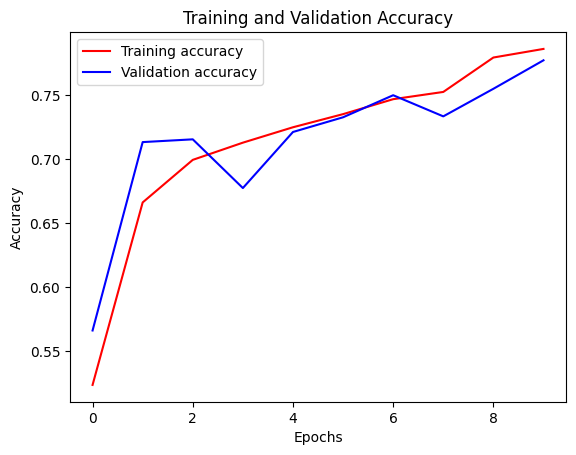

In [19]:
import matplotlib.pyplot as plt

# Step 9: Plot training and validation accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [23]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

# Step 10: Evaluate the model on the test set
y_pred = model.predict(X_test)

# Convert predicted probabilities to class labels (one-hot encoded to class labels)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Print classification report and confusion matrix
print("Classification Report:\n", classification_report(y_true_classes, y_pred_classes, target_names=classes))
print("Confusion Matrix:\n", confusion_matrix(y_true_classes, y_pred_classes))

# Calculate overall accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_true_classes, y_pred_classes)
precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')

print(f"Overall Accuracy: {accuracy:.4f}")
print(f"Weighted Precision: {precision:.4f}")
print(f"Weighted Recall: {recall:.4f}")
print(f"Weighted F1 Score: {f1:.4f}")

# Accuracy per class (from confusion matrix)
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
class_accuracy = conf_matrix.diagonal() / conf_matrix.sum(axis=1)

# Print accuracy for each class
for i, class_name in enumerate(classes):
    print(f"Accuracy for {class_name}: {class_accuracy[i]:.4f}")

44/44 ━━━━━━━━━━━━━━━━━━━━ 44s 970ms/step
Classification Report:
                       precision    recall  f1-score   support

            cataract       0.73      0.72      0.72       352
            glaucoma       0.83      0.43      0.56       340
              normal       0.64      0.96      0.77       350
diabetic_retinopathy       1.00      1.00      1.00       350

            accuracy                           0.78      1392
           macro avg       0.80      0.77      0.76      1392
        weighted avg       0.80      0.78      0.77      1392

Confusion Matrix:
 [[252  27  73   0]
 [ 80 145 115   0]
 [ 12   2 336   0]
 [  0   1   0 349]]
Overall Accuracy: 0.7773
Weighted Precision: 0.8003
Weighted Recall: 0.7773
Weighted F1 Score: 0.7651
Accuracy for cataract: 0.7159
Accuracy for glaucoma: 0.4265
Accuracy for normal: 0.9600
Accuracy for diabetic_retinopathy: 0.9971


In [21]:
# Calculate overall accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_true_classes, y_pred_classes)
precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')

print(f"Overall Accuracy: {accuracy:.4f}")
print(f"Weighted Precision: {precision:.4f}")
print(f"Weighted Recall: {recall:.4f}")
print(f"Weighted F1 Score: {f1:.4f}")

# Accuracy per class (from confusion matrix)
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
class_accuracy = conf_matrix.diagonal() / conf_matrix.sum(axis=1)

# Print accuracy for each class
for i, class_name in enumerate(classes):
    print(f"Accuracy for {class_name}: {class_accuracy[i]:.4f}")

Overall Accuracy: 0.7773
Weighted Precision: 0.8003
Weighted Recall: 0.7773
Weighted F1 Score: 0.7651
Accuracy for cataract: 0.7159
Accuracy for glaucoma: 0.4265
Accuracy for normal: 0.9600
Accuracy for diabetic_retinopathy: 0.9971
